In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import pandas as pd
data=pd.read_csv("D:\\MANIPAL_MSIS\\ML_PROJECTS\\DATA\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
x=data.iloc[:,1:8].values
x[:10]

array([[1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01, 6.270e-01,
        5.000e+01],
       [8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01, 3.510e-01,
        3.100e+01],
       [1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01, 6.720e-01,
        3.200e+01],
       [8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01, 1.670e-01,
        2.100e+01],
       [1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01, 2.288e+00,
        3.300e+01],
       [1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01, 2.010e-01,
        3.000e+01],
       [7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01, 2.480e-01,
        2.600e+01],
       [1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01, 1.340e-01,
        2.900e+01],
       [1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01, 1.580e-01,
        5.300e+01],
       [1.250e+02, 9.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 2.320e-01,
        5.400e+01]])

In [9]:
y=data.iloc[:,-1].values
y[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
x_test

array([[1.990e+02, 7.600e+01, 4.300e+01, ..., 4.290e+01, 1.394e+00,
        2.200e+01],
       [1.070e+02, 7.400e+01, 3.000e+01, ..., 3.360e+01, 4.040e-01,
        2.300e+01],
       [7.600e+01, 6.200e+01, 0.000e+00, ..., 3.400e+01, 3.910e-01,
        2.500e+01],
       ...,
       [1.420e+02, 8.600e+01, 0.000e+00, ..., 4.400e+01, 6.450e-01,
        2.200e+01],
       [1.160e+02, 7.400e+01, 1.500e+01, ..., 2.630e+01, 1.070e-01,
        2.400e+01],
       [1.070e+02, 7.200e+01, 3.000e+01, ..., 3.080e+01, 8.210e-01,
        2.400e+01]])

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train.astype(int)[:10]

array([[ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  5,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0, -3, -1,  0,  0,  0,  0],
       [ 0, -3, -1,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1],
       [ 2,  0, -1,  0, -1, -1,  2],
       [-1, -1,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [28]:
x_test

array([[ 2.45735903,  0.34674316,  1.39507401, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.43719633,  0.24436264,  0.58457246, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [-1.41253563, -0.36992051, -1.28581572, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.66399321,  0.85864578, -1.28581572, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.15403331,  0.24436264, -0.35062163, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.43719633,  0.14198211,  0.58457246, ..., -0.17788417,
         1.06487079, -0.79911377]])

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42, max_depth=3)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [30]:
y_pred=classifier.predict(x_test)
y_pred #predicted result

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [31]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[93, 14],
       [23, 24]], dtype=int64)

In [33]:
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.7597402597402597

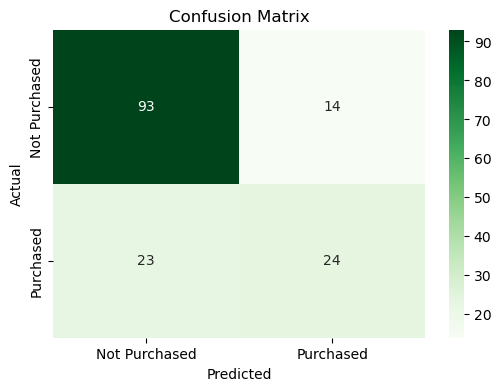

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.63      0.51      0.56        47

    accuracy                           0.76       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



[Text(0.5, 0.875, 'x[0] <= 0.082\nentropy = 0.943\nsamples = 614\nvalue = [393.0, 221.0]'),
 Text(0.25, 0.625, 'x[4] <= -0.728\nentropy = 0.69\nsamples = 352\nvalue = [287, 65]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 0.628\nentropy = 0.083\nsamples = 97\nvalue = [96, 1]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(0.375, 0.375, 'x[6] <= -0.424\nentropy = 0.813\nsamples = 255\nvalue = [191, 64]'),
 Text(0.3125, 0.125, 'entropy = 0.549\nsamples = 134\nvalue = [117, 17]'),
 Text(0.4375, 0.125, 'entropy = 0.964\nsamples = 121\nvalue = [74, 47]'),
 Text(0.75, 0.625, 'x[4] <= -0.273\nentropy = 0.974\nsamples = 262\nvalue = [106, 156]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[6] <= -0.633\nentropy = 0.909\nsamples = 74\nvalue = [50, 24]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.988\nsample

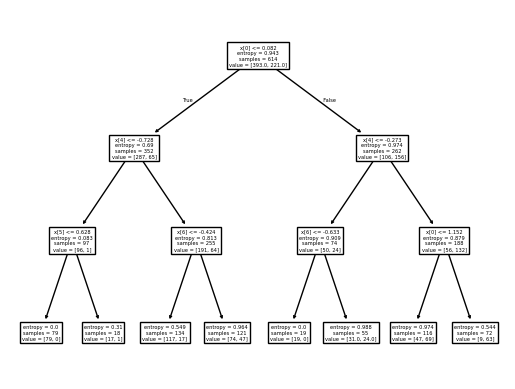

In [36]:
from sklearn import tree
tree.plot_tree(classifier)